In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

% matplotlib inline

In [2]:
filename  = r'.\data\Salaries.csv'
salaries_df = pd.read_csv(filename)
salaries_df.head()

,Id,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [3]:
groupby_rank = salaries_df.groupby(['rank'],as_index=False)['salary'].median().sort_values(by='salary', ascending=True)
rank_order = list(groupby_rank['rank'])
salaries_df['rank_num']=salaries_df['rank'].map(lambda x: rank_order.index(x)+1)

groupby_discipline = salaries_df.groupby(['discipline'],as_index=False)['salary'].median().sort_values(by='discipline', ascending=True)
discipline_order = list(groupby_discipline['discipline'])
salaries_df['discipline_num']=salaries_df['discipline'].map(lambda x: discipline_order.index(x)+1)

sex_order = list(salaries_df['sex'].unique())
salaries_df['sex_num']=salaries_df['sex'].map(lambda x: sex_order.index(x)+1)
salaries_df.head()

,Id,rank,discipline,yrs.since.phd,yrs.service,sex,salary,rank_num,discipline_num,sex_num
0,1,Prof,B,19,18,Male,139750,3,2,1
1,2,Prof,B,20,16,Male,173200,3,2,1
2,3,AsstProf,B,4,3,Male,79750,1,2,1
3,4,Prof,B,45,39,Male,115000,3,2,1
4,5,Prof,B,40,41,Male,141500,3,2,1


In [4]:
salaries = salaries_df [['Id','rank_num','discipline_num','sex_num','yrs.since.phd','yrs.service','salary']]
all_y = salaries[['salary']]
salaries.drop('salary',axis=1,inplace=True)
all_X =salaries
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(all_X,all_y,test_size=0.3, random_state =17)
print(train_X.shape)
print(test_X.shape)

(277, 6)
(120, 6)


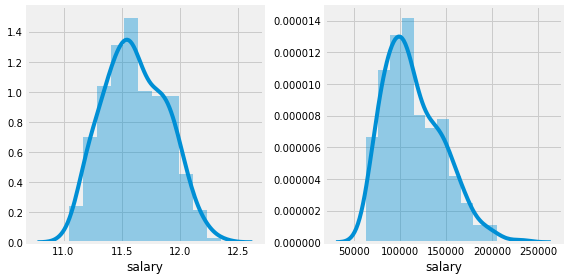

In [5]:
_, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.distplot(np.log1p(train_y['salary']),norm_hist=True,ax =axes[0])
sns.distplot(train_y['salary'],norm_hist=True,ax =axes[1])
plt.tight_layout()
plt.show()

In [6]:
train_dataset =train_X.join(train_y) # For visualization 
train_dataset.head() 

,Id,rank_num,discipline_num,sex_num,yrs.since.phd,yrs.service,salary
304,305,3,1,1,46,44,144050
99,100,3,2,1,41,26,106689
311,312,3,1,1,14,9,108100
344,345,3,2,1,32,35,150376
384,385,3,1,1,27,21,125192


In [7]:
from sklearn.linear_model import LinearRegression